It appears that Lasso is the best choice for this situation. Ridge seems as though it was most likely overfitting.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from scipy import stats
from scipy.stats import ttest_ind
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

C:\Users\starr\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df2013 = pd.read_csv("ny_crime_2013.csv")

In [3]:
df2013.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8,NaN,30,227,526,1,705,"3,243",142,NaN
4,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [4]:
#drop column that contains no data
df2013 = df2013.drop('Rape\n(revised\ndefinition)1', axis=1)

In [5]:
#simplify column names
df2013.columns = ['city', 'population', 'violent crime', 'murder', 'rape', 'robbery', 'assault', 
              'property crime','burglary', 'larceny/theft', 'motor vehicle theft', 'arson']

In [6]:
df2013 = df2013.drop(columns=['city', 'rape', 'arson'])
df2013 = df2013.replace({',': ''}, regex=True)

In [7]:
#convert all data into floats
df2013[['population', 'violent crime', 'murder', 'robbery', 'assault', 
              'property crime','burglary', 'larceny/theft', 'motor vehicle theft']] = df2013[['population', 'violent crime', 'murder', 'robbery', 'assault', 
              'property crime','burglary', 'larceny/theft', 'motor vehicle theft']].astype(float)

In [8]:
#remove outliers (based off of 3 standard deviations)
df2013[np.abs(df2013.population-df2013.population.mean())<=(3*df2013.population.std())] 
df2013 = df2013[~(np.abs(df2013.population-df2013.population.mean())>(3*df2013.population.std()))]

In [9]:
#disable warning
pd.options.mode.chained_assignment = None

df2013['population squared'] = np.square(df2013['population'])
df2013['population_sqrt'] = np.sqrt(df2013['population'])

In [10]:
#create population log columns
df2013['population log'] = pd.DataFrame(np.log(df2013['population']))

In [11]:
#drop NaN values
df2013 = df2013.dropna()

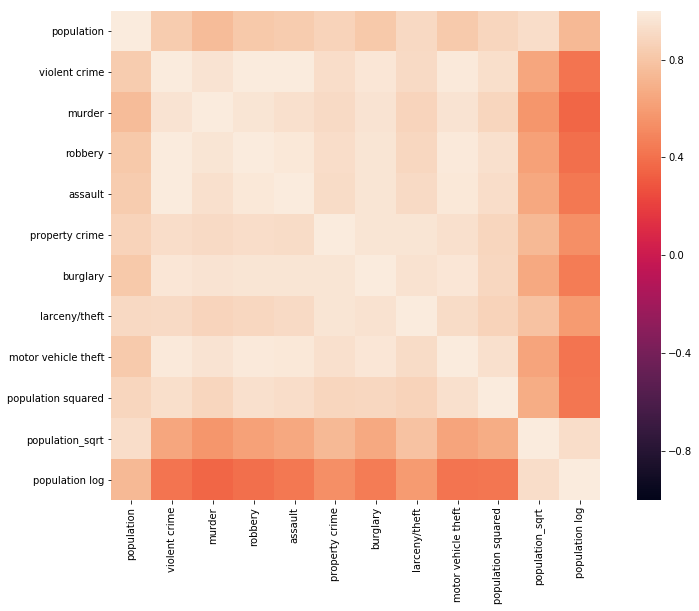

In [12]:
corrmat = df2013.corr()

f, ax = plt.subplots(figsize=(13,9))

sns.heatmap(corrmat, square=True, vmin=-1, vmax=1)
plt.show()

In [13]:
df2013['larceny_property'] = df2013['larceny/theft'] * df2013['property crime']
df2013['burglary_property'] = df2013['burglary'] * df2013['property crime']
df2013['assault_sqrt'] = (df2013['assault'] + 100) ** .5
df2013['motor vehicle theft2'] = (df2013['motor vehicle theft'] + 100) ** 2
df2013['motor vehicle theft3'] = (df2013['motor vehicle theft'] + 100) ** 3
df2013['violent crime3'] = (df2013['violent crime'] + 100) ** 3

In [14]:
X = df2013.drop('property crime', 1)
y = df2013['property crime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [15]:
lr = LogisticRegression(C=1e9)

fit = lr.fit(X_test, y_test)

pred_y_sklearn = lr.predict(X_test)

print('\n Logistic Regression Test Accuracy')
print(lr.score(X_test, y_test))


 Logistic Regression Test Accuracy
0.3142857142857143


In [16]:
fit = lr.fit(X_train, y_train)

pred_y_sklearn = lr.predict(X_train)

print('\n Logistic Regression Train Accuracy')
print(lr.score(X_train, y_train))


 Logistic Regression Train Accuracy
0.1446280991735537


In [17]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 

ridgeregr.fit(X_test, y_test)

print('\n Ridge Regression Test Accuracy')
print(ridgeregr.score(X_test, y_test))


 Ridge Regression Test Accuracy
0.9971119514959373


C:\Users\starr\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.0906095833883235e-20 / 1.1102230246251565e-16
  RuntimeWarning)


In [18]:
ridgeregr.fit(X_train, y_train)

print('\n Ridge Regression Train Accuracy')
print(ridgeregr.score(X_train, y_train))


 Ridge Regression Train Accuracy
0.9999999996781733


C:\Users\starr\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.824684191221379e-22 / 1.1102230246251565e-16
  RuntimeWarning)


In [19]:
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_test, y_test)

print('\n Lasso Regression Test Accuracy')
print(lass.score(X_test, y_test))


 Lasso Regression Test Accuracy
0.9959850548669282


C:\Users\starr\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [20]:
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, y_train)

print('\n Lasso Regression Train Accuracy')
print(lass.score(X_train, y_train))


 Lasso Regression Train Accuracy
0.9997382695430674


C:\Users\starr\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


There seems to be something going wrong (considering the errors and the strange scores) but I am unable to find them at this time.